In [ ]:
# Bring in the appropriate tool for connecting to cloud-based storage
from google.colab import drive
# Use a virtual folder from the online workspace to access saved resources
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries**


In [ ]:
# To manipulate and analyze data
import pandas as pds
# For procedures involving numbers
import numpy as nmy
# To separate training and testing sets of data
from sklearn.model_selection import train_test_split
# To scale features
from sklearn.preprocessing import StandardScaler
# To assess the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# To determine the precise metric
from sklearn.metrics import precision_score
# To calculate the recall
from sklearn.metrics import recall_score
# To use synthetic sampling to address class imbalance
from imblearn.over_sampling import SMOTE
# To choose the best features using statistical testing
from sklearn.feature_selection import SelectKBest, f_classif
# Using XGBoost for classification tasks
from xgboost import XGBClassifier
# Boosting with decision trees in an ensemble model
from sklearn.ensemble import GradientBoostingClassifier
# LightGBM for quick gradient enhancement
from lightgbm import LGBMClassifier
# Uses majority vote to combine many models
from sklearn.ensemble import VotingClassifier
# To produce visuals and plots
import matplotlib.pyplot as mt_plt
# For sophisticated data style and visualization
import seaborn as sbn
# For finding the dataset's outliers
from sklearn.neighbors import LocalOutlierFactor
# Converts numeric data from categorical data
from sklearn.preprocessing import LabelEncoder
# Normalizes feature values (already imported; think about eliminating duplicates)
from sklearn.preprocessing import StandardScaler
# Using hybrid sampling to clean and balance the dataset
from imblearn.combine import SMOTEENN
# To determine how often a class label or element appears
from collections import Counter
# To adjust hyperparameters through cross-validation
from sklearn.model_selection import GridSearchCV
# To compute AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc
# Using several decision trees in an ensemble classification
from sklearn.ensemble import RandomForestClassifier
# Chooses features from a trained model according to their significance.
from sklearn.feature_selection import SelectFromModel
# For handling alerts
import warnings
# During execution, warning output is suppressed.
warnings.filterwarnings("ignore")

**Load Dataset**

In [ ]:
# Utilizing pandas, Acquire the data from Google Drive.
modelling_data = pds.read_csv('/content/drive/MyDrive/Ankita Kushwah/Churn_Modelling.csv')
#  confirm the contents and structure, display the loaded DataFrame.
modelling_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Display the dataset's row and column counts.
modelling_data.shape

(10000, 14)

In [ ]:
# Show the Type categories and Available values in the columns.
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Determine how many missing values each feature has.
modelling_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Determine how many duplicate records there are overall.
modelling_data.duplicated().sum()

np.int64(0)

**Make Count Plot**

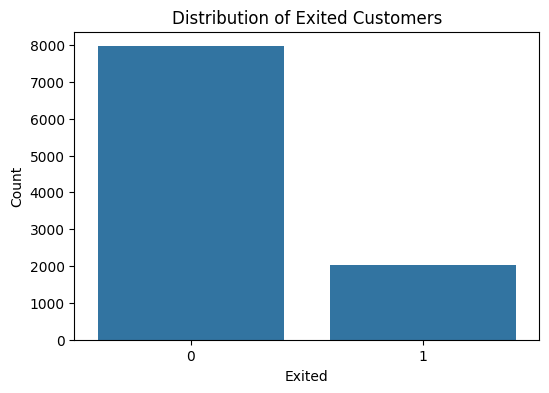

In [ ]:
# Define the plot's dimensions
mt_plt.figure(figsize=(6, 4))
# Show the target column's frequency for each category
sbn.countplot(x='Exited', data=modelling_data)
# Display each class's frequency in the aim column.
mt_plt.title('Distribution of Exited Customers')
# Give the horizontal axis a label.
mt_plt.xlabel('Exited')
# Give the vertical axis a label.
mt_plt.ylabel('Count')
# Execute the visualization.
mt_plt.show()

**Apply Label Encoding**


In [ ]:
# Determine which columns contain object or category data types.
object_cols = modelling_data.select_dtypes(include='object').columns
# LabelEncoder should be used to encode all categorical columns.
for col in object_cols:
  # make an instance of the label encoder.
    le = LabelEncoder()
    # Change text labels to numeric values
    modelling_data[col] = le.fit_transform(modelling_data[col])
# Show the modified dataset's initial few rows.
print(modelling_data.head())

   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1822          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

**Outlier detection and removal using box plot**

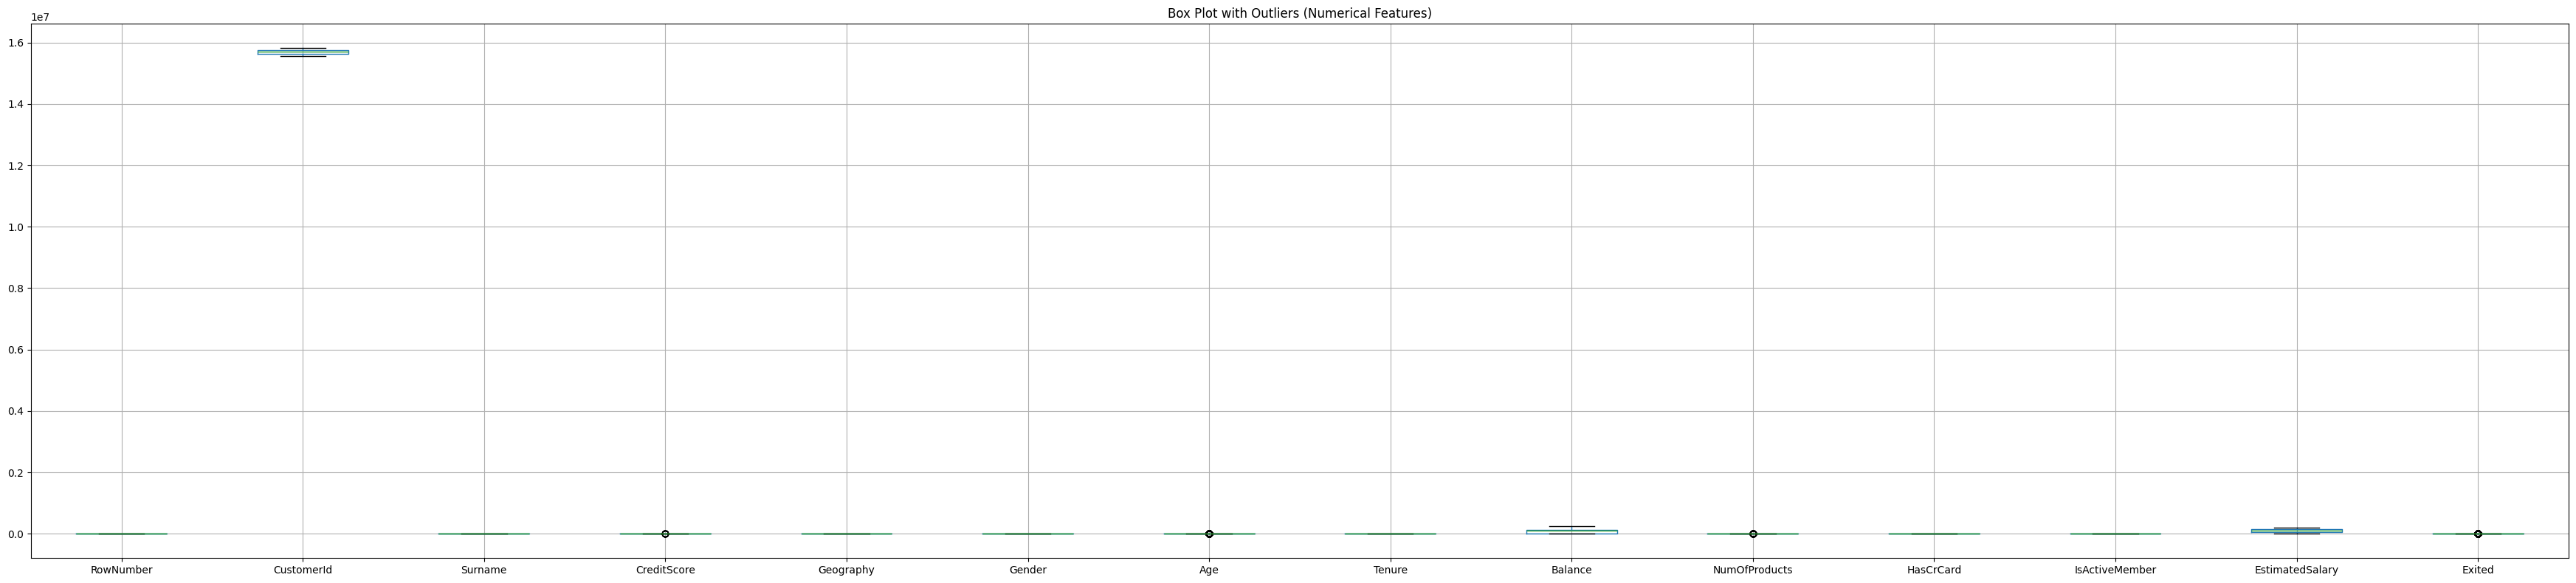

In [ ]:
# Pick just data's numerical columns.
numeric_df = modelling_data.select_dtypes(include=nmy.number)
# Detect outliers using Local Outlier Factor on the numeric data
lcof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
# Find outliers: gives -1 for outliers and 1 for inlie
outliers = lcof.fit_predict(numeric_df)
# To store outlier flags, make a copy of the numerical data.
numeric_modelling_data_with_outliers = numeric_df.copy()
# Add a new column with the outlier labels.
numeric_modelling_data_with_outliers['outlier'] = outliers
# Adjust the boxplot's dimensions.
mt_plt.figure(figsize=(35, 8))
# Use a boxplot to visualize spread and identify abnormalities.
numeric_df.boxplot()
# Include a header for the chart.
mt_plt.title('Box Plot with Outliers (Numerical Features)')
# Modify the arrangement for improved spacing
mt_plt.tight_layout()
# Show the boxplot.
mt_plt.show()

In [ ]:
# Eliminate rows from the dataset that were identified as outliers (-1).
df_cleaned = numeric_modelling_data_with_outliers[numeric_modelling_data_with_outliers['outlier'] != -1].drop(columns=['outlier'])
# Verify that the cleaned DataFrame has its original columns and structure.
df_cleaned = pds.DataFrame(df_cleaned, columns=numeric_df.columns)

In [ ]:
# Verify that the original columns and structure of the cleaned DataFrame remain.
df_cleaned = numeric_modelling_data_with_outliers[numeric_modelling_data_with_outliers['outlier'] != -1].drop(columns=['outlier'])
# show the dimensions of the data before outlier filtering.
print(f"Shape before outlier removal: {numeric_modelling_data_with_outliers.shape}")
# show the dimensions of the data after outlier filtering.
print(f"Shape after outlier removal: {df_cleaned.shape}")

Shape before outlier removal: (10000, 15)
Shape after outlier removal: (9900, 14)


**Separate Features**

In [ ]:
# Input variables are defined by removing the target column.
X = modelling_data_cleaned.drop("Exited", axis=1)
# Take the dataset's target labels out.
y = modelling_data_cleaned["Exited"]

In [ ]:
X.shape, y.shape

((9900, 13), (9900,))

**Feature scalling**

In [ ]:
# Start the normalizing standard scaler.
scaler = StandardScaler()
# Convert features to a uniform scale
X_scaled = scaler.fit_transform(X)

**Feature selection using Random Forest**

Top 10 characteristics selected by Random Forest:
['Age', 'NumOfProducts', 'Balance', 'CustomerId', 'EstimatedSalary', 'CreditScore', 'RowNumber', 'Surname', 'Tenure', 'IsActiveMember']


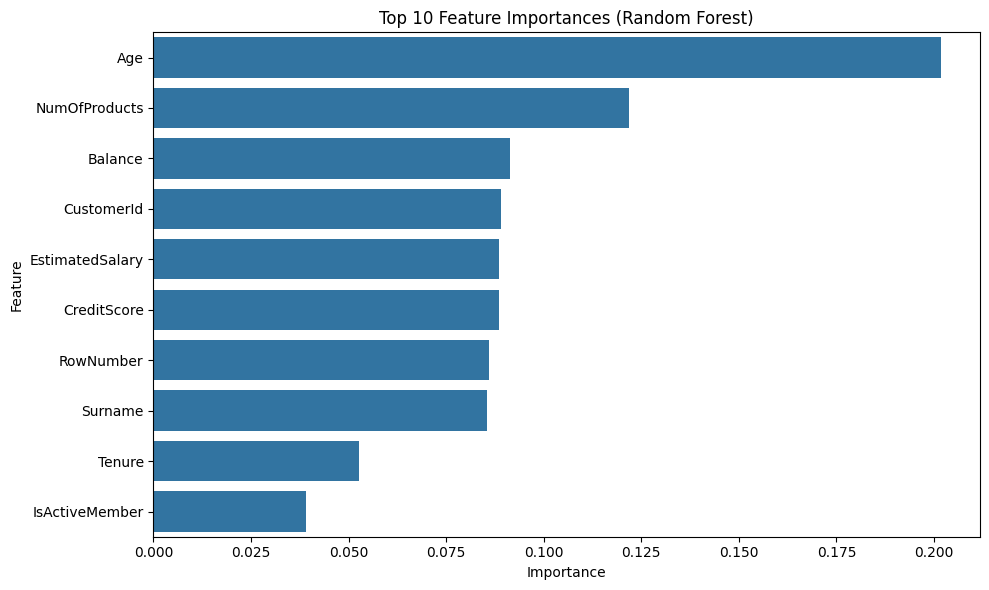

In [ ]:
# Use a hundred decision trees to train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model with target labels and scaled input features.
model.fit(X_scaled, y)
# Take the trained algorithm's feature significance scores and extract them.
feature_importances = pds.Series(model.feature_importances_, index=X.columns)
# Select the top ten characteristics based on importance
top_10_features_rf = feature_importances.nlargest(10).index.tolist()
# Show the chosen ten most crucial qualities.
print("Top 10 characteristics selected by Random Forest:")
# Display the top ten predictors' significance scores.
print(top_10_features_rf)
# Display the top ten predictors' significance scores.
mt_plt.figure(figsize=(10, 6))
sbn.barplot(x=feature_importances.loc[top_10_features_rf], y=top_10_features_rf)
# Include an evocative title
mt_plt.title('Top 10 Feature Importances (Random Forest)')
# Designation for the horizontal axis
mt_plt.xlabel('Importance')
# vertical axis labeling
mt_plt.ylabel('Feature')
# To improve clarity, adjust the spacing.
mt_plt.tight_layout()
mt_plt.show()

**Balance the data using SMOTEEN**

In [ ]:
# To do both over-sampling and under-sampling, import the Synthetic Minority Over-sampling Technique Edited Nearest Neighbours function
smote_enn = SMOTEENN(random_state=42)
# Execute the hybrid rebalancing technique on the input features and target
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

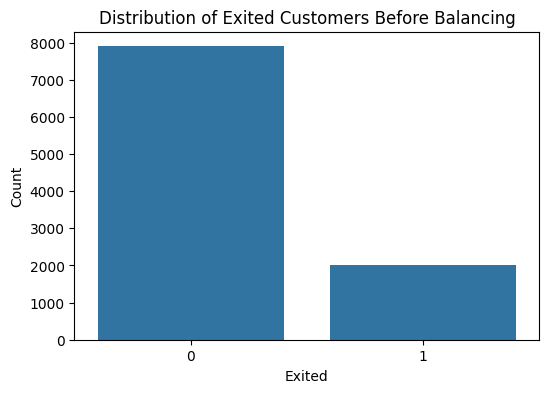

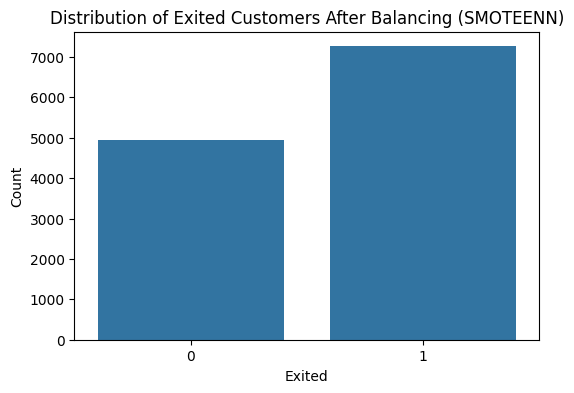

In [ ]:
# Create a figure to display class count prior to applying balancing
mt_plt.figure(figsize=(6, 4))
# Before balancing the dataset, visualize the label distribution.
sbn.countplot(x=y)
# Add title for the initial class spread plot
mt_plt.title('Distribution of Exited Customers Before Balancing')
# Label the horizontal axis with target class name
mt_plt.xlabel('Exited')
# Give the vertical axis a name to symbolize frequency.
mt_plt.ylabel('Count')
# present the storyline on the screen.
mt_plt.show()
# Create a second figure to show the label spread after balancing.
mt_plt.figure(figsize=(6, 4))
# After resampling, make a bar graph for the Normalized Observation set
sbn.countplot(x=y_resampled)
# Title for the revised allocation of classes following SMOTEENN
mt_plt.title('Distribution of Exited Customers After Balancing (SMOTEENN)')
# Assign the Parallel to the ground axis label.
mt_plt.xlabel('Exited')
# Put a label on the Up-down axis to indicate how many entries there are.
mt_plt.ylabel('Count')
# Show the data visualization that is balanced.
mt_plt.show()

Split the data

In [ ]:
# Separate the newly balanced dataset into training and testing subsets
X_trn, X_tst, y_trn, y_tst = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Initialize, train and evaluate the XG boost model**


In [ ]:
# Initialize XGBoost Model
xgbst_model = XGBClassifier(random_state=42)

In [ ]:
# Apply the XGBoost model to the data's training partition.
xgbst_model.fit(X_trn, y_trn)
# Produce forecasts using the training data.
y_est_xgbst_trn = xgbst_model.predict(X_trn) # Changed prdct to predict
# Generate output for testing samples that are not visible.
y_est_xgbst_tst = xgbst_model.predict(X_tst) # Changed prdct to predict

In [ ]:
# Use the train set's actual and expected labels to calculate and print accuracy.
acc_xgbst = accuracy_score(y_trn, y_est_xgbst_trn)
print(f"Accuracy ((XGBoost - Train Set): {acc_xgbst:.4f}")
# Calculate the prediction precision value using training records.
Prsn_xgbst = precision_score(y_trn, y_est_xgbst_trn)
print(f"Precision_score (XGBoost - Train Set): {Prsn_xgbst:.4f}")
# Determine the recall score by analyzing the train set's missed positives.
Rcll_xgbst = recall_score(y_trn, y_est_xgbst_trn)
print(f"Recall ((XGBoost - Train Set): {Rcll_xgbst:.4f}")
# Calculate the train results' harmonic mean of precision and recall.
f1_xgbst = f1_score(y_trn, y_est_xgbst_trn)# Display all Categorizationclassification metrics for assessing training data.
print(f"F1 Score ((XGBoost - Train Set): {f1_xgbst:.4f}")

Accuracy ((XGBoost - Train Set): 0.9987
Precision_score (XGBoost - Train Set): 0.9991
Recall ((XGBoost - Train Set): 0.9986
F1 Score ((XGBoost - Train Set): 0.9989


In [ ]:
# Display all Categorization metrics for assessing training data.
print("XGBoost Classification Report (Training Data):")
print(classification_report(y_trn, y_est_xgbst_trn))

XGBoost Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3939
           1       1.00      1.00      1.00      5827

    accuracy                           1.00      9766
   macro avg       1.00      1.00      1.00      9766
weighted avg       1.00      1.00      1.00      9766



Text(120.72222222222221, 0.5, 'True Label')

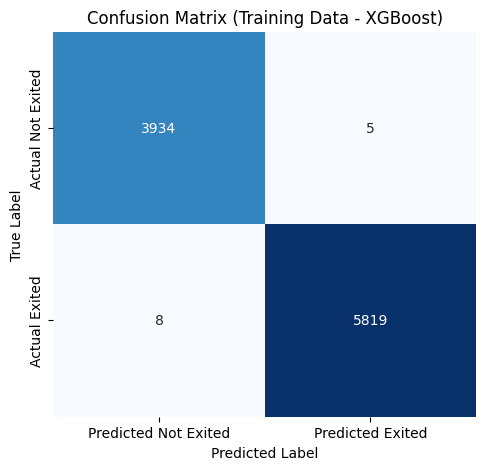

In [ ]:
# Start a fresh figure arrangement for the error matrix visual analysis.
mt_plt.figure(figsize=(12, 5))
# Configure the training matrix visualization's location.
mt_plt.subplot(1, 2, 1)
# Create a error matrix to compare train forecasts.
cm_train = confusion_matrix(y_trn, xgbst_model.predict(X_trn))
# Plot heatmap for error matrix with color coding and labels
sbn.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Above the training error matrix, include a descriptive title.
mt_plt.title('Confusion Matrix (Training Data - XGBoost)')
# Define the prediction categories' x-axis label.
mt_plt.xlabel('Predicted Label')
# Indicate the actual goal values by specifying the y-axis label.
mt_plt.ylabel('True Label')

In [ ]:
# Evaluate the predicted accuracy of the model using a test dataset.
acc_xgbst = accuracy_score(y_tst, y_est_xgbst_tst)
print(f"Accuracy (XGBoost - Test Set): {acc_xgbst:.4f}")
# Evaluate the percentage of pertinent examples that were obtained (test)
Prsn_xgbst = precision_score(y_tst, y_est_xgbst_tst)
print(f"Precision_score (XGBoost - Test Set): {Prsn_xgbst:.4f}")
# Use the recall measure to assess the model's sensitivity to test data.
Rcll_xgbst = recall_score(y_tst, y_est_xgbst_tst)
print(f"Recall (XGBoost - Test Set): {Rcll_xgbst:.4f}")
# Assess test performance using the F1 metric.
f1_xgbst = f1_score(y_tst, y_est_xgbst_tst)
print(f"F1 Score (XGBoost - Test Set): {f1_xgbst:.4f}")

Accuracy (XGBoost - Test Set): 0.9488
Precision_score (XGBoost - Test Set): 0.9548
Recall (XGBoost - Test Set): 0.9581
F1 Score (XGBoost - Test Set): 0.9565


In [ ]:
# Provide a thorough performance analysis for the testing stage.
print("XGBoost Classification Report:")
print(classification_report(y_tst, y_est_xgbst_tst))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1009
           1       0.95      0.96      0.96      1433

    accuracy                           0.95      2442
   macro avg       0.95      0.95      0.95      2442
weighted avg       0.95      0.95      0.95      2442



Text(120.72222222222221, 0.5, 'True Label')

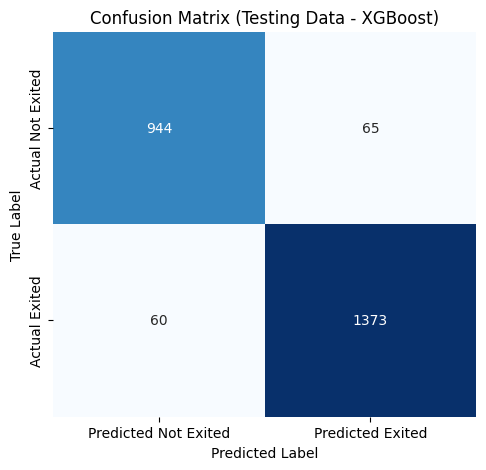

In [ ]:
# Create an additional figure for the testing matrix's visual inspection.
mt_plt.figure(figsize=(12, 5))
# Set placement for second matrix plot inside the figure
mt_plt.subplot(1, 2, 1)
# To validate the model, create a error matrix using test predictions.
cm_train = confusion_matrix(y_tst, xgbst_model.predict(X_tst))
# To facilitate analysis, render the test matrix as an annotated heatmap.
sbn.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Give the matrix visualization from test data a clear title.
mt_plt.title('Confusion Matrix (Testing Data - XGBoost)')
# Set the title of the horizontal axis for the anticipated results.
mt_plt.xlabel('Predicted Label')
# Put the actual observations' title on the vertical axis.
mt_plt.ylabel('True Label')

**Initialize, train and evaluate the LGBM model**

In [ ]:
# To guarantee consistent training results, initialize the LightGBM classifier with a fixed random seed.
lgbmcl_model = LGBMClassifier(random_state=42)

In [ ]:
# Use the training dataset to train the LightGBM classifier.
lgbmcl_model.fit(X_trn, y_trn)
# To assess model performance, generate predictions using the training dataset.
y_est_lgbmcl_trn = lgbmcl_model.predict(X_trn)
# Create forecasts using the test dataset that hasn't been seen in order to evaluate performance.
y_est_lgbmcl_tst = lgbmcl_model.predict(X_tst)

[LightGBM] [Info] Number of positive: 5827, number of negative: 3939
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2756
[LightGBM] [Info] Number of data points in the train set: 9766, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596662 -> initscore=0.391575
[LightGBM] [Info] Start training from score 0.391575


In [ ]:
# Use an accuracy metric to assess how accurate predictions are on training data.
acc_lgbmcl = accuracy_score(y_trn, y_est_lgbmcl_trn)
print(f"Accuracy (LightGBM - train Set): {acc_lgbmcl:.4f}")
# Calculate the percentage of actual positive predictions compared to all expected positive predictions.
Prsn_lgbmcl = precision_score(y_trn, y_est_lgbmcl_trn)
print(f"Precision_score (LightGBM - train Set): {Prsn_lgbmcl:.4f}")
# Determine the model's capacity to accurately recognize real positives.
Rcll_lgbmcl = recall_score(y_trn, y_est_lgbmcl_trn)
print(f"Recall (LightGBM - train Set): {Rcll_lgbmcl:.4f}")
# Determine how to balance recollection and precision for a thorough assessment.
f1_lgbmcl = f1_score(y_trn, y_est_lgbmcl_trn)
print(f"F1 Score (LightGBM - train Set): {f1_lgbmcl:.4f}")

Accuracy (LightGBM - train Set): 0.9800
Precision_score (LightGBM - train Set): 0.9865
Recall (LightGBM - train Set): 0.9799
F1 Score (LightGBM - train Set): 0.9832


In [ ]:
# Show a label indicating how well the LightGBM model classified training data.
print("\nLightGBM (Tuned) Classification Report (Training Data):")
# Provide each class's precise precision, recall, F1-score, and support in detail.
print(classification_report(y_trn, y_est_lgbmcl_trn))


LightGBM (Tuned) Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3939
           1       0.99      0.98      0.98      5827

    accuracy                           0.98      9766
   macro avg       0.98      0.98      0.98      9766
weighted avg       0.98      0.98      0.98      9766



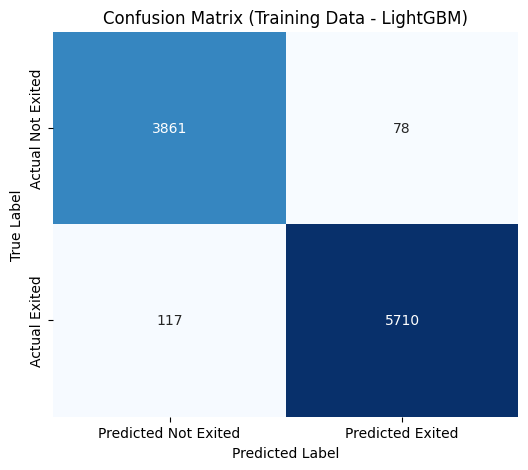

In [ ]:
# Configure the canvas size for the LightGBM training results' confusion matrix.
mt_plt.figure(figsize=(6, 5))
# Use the actual and anticipated training data to create a confusion matrix.
cm_train_lgbm = confusion_matrix(y_trn, y_est_lgbmcl_trn)
# To see incorrect classifications and accurate predictions, make a heatmap.
sbn.heatmap(cm_train_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Add title to highlight the evaluation context
mt_plt.title('Confusion Matrix (Training Data - LightGBM)')
# Indicate the predicted classes on the x-axis.
mt_plt.xlabel('Predicted Label')
# Indicate the actual outcome categories on the y-axis.
mt_plt.ylabel('True Label')
# Display the heatmap plot on the screen.
mt_plt.show()

In [ ]:
# Examine the test dataset's prediction accuracy.
acc_lgbmcl= accuracy_score(y_tst, y_est_lgbmcl_tst)
print(f"Accuracy (LightGBM - Test Set): {acc_lgbmcl:.4f}")
# Calculate the percentage of accurate positive forecasts.
Prsn_lgbmcl = precision_score(y_tst, y_est_lgbmcl_tst)
print(f"Precision_score (LightGBM - Test Set): {Prsn_lgbmcl:.4f}")
# Evaluate the model's capacity to recognize real positive cases.
Rcll_lgbmcl = recall_score(y_tst, y_est_lgbmcl_tst)
print(f"Recall (LightGBM - Test Set): {Rcll_lgbmcl:.4f}")
# To get balanced performance information, calculate the harmonic mean of precision and recall.
f1_lgbmcl = f1_score(y_tst, y_est_lgbmcl_tst)
print(f"F1 Score (LightGBM - Test Set): {f1_lgbmcl:.4f}")

Accuracy (LightGBM - Test Set): 0.9468
Precision_score (LightGBM - Test Set): 0.9534
Recall (LightGBM - Test Set): 0.9560
F1 Score (LightGBM - Test Set): 0.9547


In [ ]:
# Present a thorough analysis of the LightGBM test predictions' categorization metrics.
print("\nClassification Report:\n", classification_report(y_tst, y_est_lgbmcl_tst))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1009
           1       0.95      0.96      0.95      1433

    accuracy                           0.95      2442
   macro avg       0.95      0.94      0.95      2442
weighted avg       0.95      0.95      0.95      2442



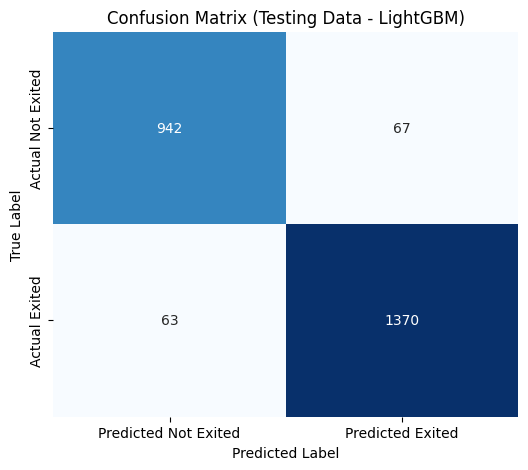

In [ ]:
# Define the plot's canvas size.
mt_plt.figure(figsize=(6, 5))
# Generate predictions for the test dataset using the LightGBM model
y_est_lgbmcl_tst = lgbmcl_model.predict(X_tst)
# Create the error matrix by contrasting the predicted and actual labels.
cm_test_lgbm = confusion_matrix(y_tst, y_est_lgbmcl_tst)
# To visualize the error matrix, create a heatmap.
sbn.heatmap(cm_test_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Add a descriptive title to the matrix plot
mt_plt.title('Confusion Matrix (Testing Data - LightGBM)')
# Indicate the plot's horizontal axis.
mt_plt.xlabel('Predicted Label')
# Indicate the plot's vertical axis.
mt_plt.ylabel('True Label')
# Provide the output with the entire heatmap shown.
mt_plt.show()

**Initialize, train and evaluate the gradient boost model**

In [ ]:
# Set up the Gradient Boosting model with specific hyperparameters:
# n_estimators: the number of boosting rounds.
# learning_rate: Controls the contribution of each tree.
# Limit tree complexity with max_depth and random_state to ensure reproducible results.
grdb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Fit the model to the training section of the data
grdb_model.fit(X_trn, y_trn)
# Create predictions using the training dataset.
y_est_grdb_trn = grdb_model.predict(X_trn)
# Make predictions on the previously unseen test dataset.
y_est_grdb_tst = grdb_model.predict(X_tst)

In [ ]:
# Display a label for the accuracy result of the training dataset.
print("Gradient Boosting Accuracy Score (Training Data):")
# Determine and print how frequently predictions matched actual labels.
print(accuracy_score(y_trn, y_est_grdb_trn))
# Label for precision score output during training split.
print("Gradient Boosting Precision Score (Training Data):")
# Display the ratio of successfully predicted positives versus total predicted positives.
print(precision_score(y_trn, y_est_grdb_trn))
# Label for recall score result in training part.
print("Gradient Boosting Recall Score (Training Data):")
# Return the proportion of true positives found among all actual positives.
print(recall_score(y_trn, y_est_grdb_trn))
# Label the F1 score output to sum up precision and recall.
print("Gradient Boosting F1 Score (Training Data):")
# Output the harmonic mean of precision and recall.
print(f1_score(y_trn, y_est_grdb_trn))

Gradient Boosting Accuracy Score (Training Data):
0.9228957608027851
Gradient Boosting Precision Score (Training Data):
0.9308763586956522
Gradient Boosting Recall Score (Training Data):
0.9406212459241462
Gradient Boosting F1 Score (Training Data):
0.9357234314980793


In [ ]:
# Display a header to indicate the Categorization summary for training predictions
print("Gradient Boosting Classification Report (Training Data):")
# Output detailed metrics including precision, recall, F1-score, and support for each class
print(classification_report(y_trn, y_est_grdb_trn))

Gradient Boosting Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3939
           1       0.93      0.94      0.94      5827

    accuracy                           0.92      9766
   macro avg       0.92      0.92      0.92      9766
weighted avg       0.92      0.92      0.92      9766



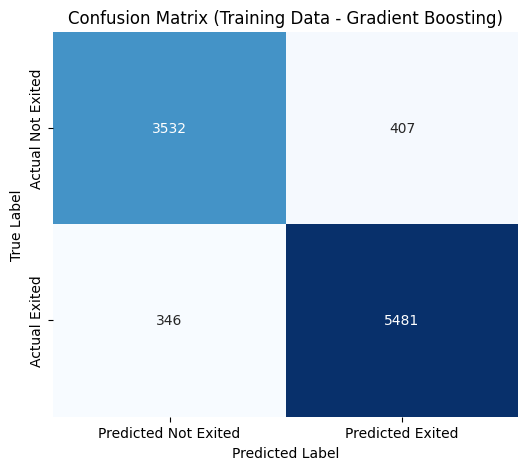

In [ ]:
# Create a figure for the heatmap with a defined width and height
mt_plt.figure(figsize=(6, 5))
# Create a error matrix from real and predicted training labels
cm_train_grdb = confusion_matrix(y_trn,  y_est_grdb_trn)
# Plot the error matrix using Seaborn's heatmap for visual clarity.
sbn.heatmap(cm_train_grdb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Set the main title of the plot indicating it's from training data
mt_plt.title('Confusion Matrix (Training Data - Gradient Boosting)')
# Label the X-axis to indicate the projected classes
mt_plt.xlabel('Predicted Label')
# Label the Y-axis to represent actual classifications
mt_plt.ylabel('True Label')
# Send the plot to the output.
mt_plt.show()

In [ ]:
# Output label displaying the Gradient Boosting model's reported metric
print("Gradient Boosting Accuracy Score (Testing Data):")
# Calculate and show the test dataset's percentage of accurate predictions.
print(accuracy_score(y_tst, y_est_grdb_tst))
# Display the precision score output's label
print("Gradient Boosting Precision Score (Testing Data):")
# Calculate and present the fraction of relevant instances among retrieved ones
print(precision_score(y_tst, y_est_grdb_tst))
# The display header for the output of the recall metric
print("Gradient Boosting Recall Score (Testing Data):")
# Determine and print the percentage of accurately predicted positives among all actual positives.
print(recall_score(y_tst, y_est_grdb_tst))
# Indicate the measure presented next (harmonic mean of precision and recall).
print("Gradient Boosting F1 Score (Testing Data):")
# Evaluate and return the balance between precision and recall
print(f1_score(y_tst, y_est_grdb_tst))

Gradient Boosting Accuracy Score (Testing Data):
0.923013923013923
Gradient Boosting Precision Score (Testing Data):
0.9290144727773949
Gradient Boosting Recall Score (Testing Data):
0.9406838799720866
Gradient Boosting F1 Score (Testing Data):
0.9348127600554785


In [ ]:
# Show the title of the report that identifies the model and dataset it pertains to.
print("Gradient Boosting Classification Report (Testing Data):")
# Print a thorough synopsis for every class that includes precision, recall, f1-score, and support.
print(classification_report(y_tst, y_est_grdb_tst))

Gradient Boosting Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1009
           1       0.93      0.94      0.93      1433

    accuracy                           0.92      2442
   macro avg       0.92      0.92      0.92      2442
weighted avg       0.92      0.92      0.92      2442



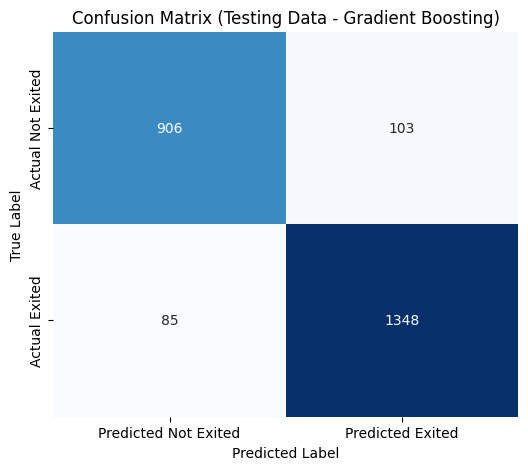

In [ ]:
# Configure the heatmap visualization's figure size.
mt_plt.figure(figsize=(6, 5))
# Create the error matrix for Gradient Boosting using the actual and anticipated values.
cm_test_grdb = confusion_matrix(y_tst, y_est_grdb_tst)
# Display the matrix with annotations and customized color settings
sbn.heatmap(cm_test_grdb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Not Exited', 'Predicted Exited'],
            # Y-axis Labels
            yticklabels=['Actual Not Exited', 'Actual Exited'])
# Include a title that explains the meaning of the story.
mt_plt.title('Confusion Matrix (Testing Data - Gradient Boosting)')
# Indicate the expected results by labeling the horizontal axis.
mt_plt.xlabel('Predicted Label')
# Indicate actual results by labeling the vertical axis.
mt_plt.ylabel('True Label')
# Create the finished chart.
mt_plt.show()

**ROC curve**

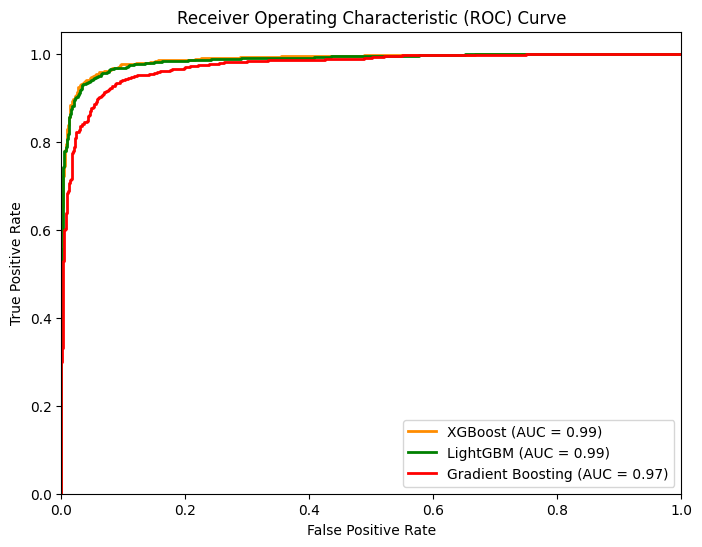

In [ ]:
# For each model, calculate the expected class probabilities and extract values for the positive class (Exited).
# Use predict_proba to get probabilities instead of predict
y_est_xgbst_tst = xgbst_model.predict_proba(X_tst)[:, 1]
# Probability scores for XGBoost
# Use predict_proba to get probabilities instead of predict
y_est_lgbmcl_tst = lgbmcl_model.predict_proba(X_tst)[:, 1]
# LightGBM likelihood scores
# Use predict_proba to get probabilities instead of predict
y_est_grdb_tst = grdb_model.predict_proba(X_tst)[:, 1]

# Using predicted probability and true labels, determine the components of each model's ROC curve.
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_tst, y_est_xgbst_tst)
# LightGBM's FPR and TPR
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_tst, y_est_lgbmcl_tst)
# Boosting Gradients using FPR and TPR
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_tst, y_est_grdb_tst)

# Examine each of the three classifiers' Area Under the ROC Curve (AUC).
# XGBoost model's AUC score
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
# LightGBM model's AUC score
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
# Gradient Boosting model's AUC score
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Set up the figure such that the ROC curves can be shown.
mt_plt.figure(figsize=(8, 6))

# Add XGBoost ROC curve to the plot
mt_plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# Give the LightGBM ROC curve a distinctive hue.
mt_plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')
# Draw ROC line for Gradient Boosting classifier
mt_plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Establish 0 (no false positives) and 1 (all false positives) as the x-axis limits.
mt_plt.xlim([0.0, 1.0])
# Define y-axis range from 0 to slightly above 1 for visual margin
mt_plt.ylim([0.0, 1.05])

# Label the horizontal axis to indicate the proportion of false positives
mt_plt.xlabel('False Positive Rate')
# Indicate the rate of true positives by labeling the vertical axis.
mt_plt.ylabel('True Positive Rate')

# Add chart title to explain what the plot represents
mt_plt.title('Receiver Operating Characteristic (ROC) Curve')

# To ensure that models are easily identified, place the legend in the lower right corner
mt_plt.legend(loc="lower right")

# Display all of the model curves in the final ROC plot
mt_plt.show()

**Comparison graph**

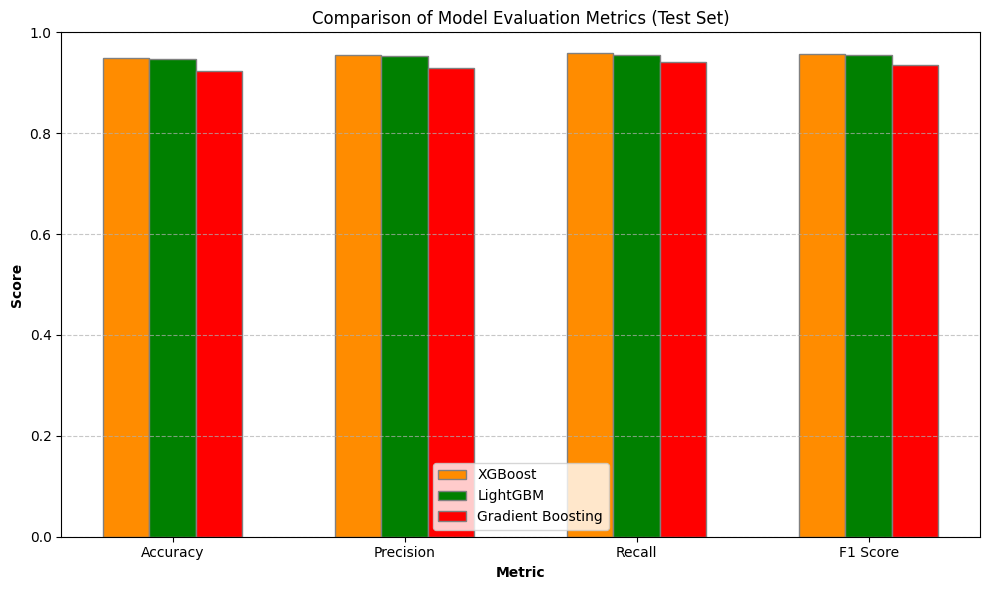

In [ ]:
# Assemble performance indicators for every model assessed using the test dataset.
metrics_data = {
  # Specify the categories for evaluation.
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'XGBoost': [
        # Use binary predictions for these metrics
        accuracy_score(y_tst, y_pred_xgbst_tst),
        precision_score(y_tst, y_pred_xgbst_tst),
        recall_score(y_tst, y_pred_xgbst_tst),
        f1_score(y_tst, y_pred_xgbst_tst)
    ],
  # LightGBM classifier metrics
    'LightGBM': [
        # Use binary predictions for these metrics
        accuracy_score(y_tst, y_pred_lgbmcl_tst),
        precision_score(y_tst, y_pred_lgbmcl_tst),
        recall_score(y_tst, y_pred_lgbmcl_tst),
        f1_score(y_tst, y_pred_lgbmcl_tst)
    ],
  # Traditional Gradient Boosting classifier metrics
    'Gradient Boosting': [
        # Use binary predictions for these metrics
        accuracy_score(y_tst, y_pred_grdb_tst),
        precision_score(y_tst, y_pred_grdb_tst),
        recall_score(y_tst, y_pred_grdb_tst),
        f1_score(y_tst, y_pred_grdb_tst)
    ]
}
# To facilitate charting, convert metrics into a tabular format.
metrics_modelling_data = pds.DataFrame(metrics_data)
# To improve visualization, initialize the figure with unique dimensions.
mt_plt.figure(figsize=(10, 6))
# In the grouped bar chart, set the width of each bar.
bar_width = 0.2
# Determine the location of the XGBoost bars.
r1 = nmy.arange(len(metrics_modelling_data['Metric']))
# LightGBM bars are offset to the right of the XGBoost bars.
r2 = [x + bar_width for x in r1]
# Gradient Boosting bars are further offset to the right than LightGBM bars.
r3 = [x + bar_width for x in r2]
# Draw performance bars for XGBoost.
mt_plt.bar(r1, metrics_modelling_data['XGBoost'], color='darkorange', width=bar_width, edgecolor='grey', label='XGBoost')
# Draw performance bars for LightGBM.
mt_plt.bar(r2, metrics_modelling_data['LightGBM'], color='green', width=bar_width, edgecolor='grey', label='LightGBM')
# Plot the gradient Enhancing performance bars
mt_plt.bar(r3, metrics_modelling_data['Gradient Boosting'], color='red', width=bar_width, edgecolor='grey', label='Gradient Boosting')
# For clarity, add an x-axis label.
mt_plt.xlabel('Metric', fontweight='bold')
# Include a label on the y-axis that shows the score numbers.
mt_plt.ylabel('Score', fontweight='bold')
# Assign labels and x-tick locations according to metric categories.
mt_plt.xticks([r + bar_width for r in range(len(metrics_modelling_data['Metric']))], metrics_modelling_data['Metric'])
# Include a title that encapsulates the goal of the chart.
mt_plt.title('Comparison of Model Evaluation Metrics (Test Set)')
# For normalized scores, restrict y-axis values to the 0–1 range.
mt_plt.ylim(0, 1)
# Add a legend to help distinguish between the models.
mt_plt.legend()
# Include grid lines along the y-axis to improve readability.
mt_plt.grid(axis='y', linestyle='--', alpha=0.7)
# Modify the arrangement to avoid element overlap.
mt_plt.tight_layout()
# Show the completed chart.
mt_plt.show()